# Project Final Report

## Introduction

### Relevant Background Information
A research group in Computer Science at UBC is collecting data about how people play video games. They set up a Minecraft Server and recorded players' actions.

### Question that we are trying to answer
Our group will answer the question about which "kinds" of players are most likely to contribute a large amount of data so that the research group can target those players in their recruiting efforts, specifically, which age groups tend to contribute the most playtime?

### Describing the dataset
The Players.csv and Sessions.csv datasets contain data about the players, including personal and tracked information, and each session of PLAICraft that occurred.

#### Player Data
This file contains data about the players' sign-up and tracking information from PLAICraft
- 197 observations
- 9 variables 

#### Variables
| Experience (character) | Subscribe (logical) | hashedEmail (character) | played_hours (double) | name (character) | gender (character) | age (double) | individualid (logical) | organizationName (logical) |
| ---------- | --------- | ----------- | ------------ | ---- | ------ | --- | ------------ | ---------------- |
| How familiar the player is with Minecraft | Whether player has subscribed to PLAICraft's email updates| Encrypted email address of the player | How many hours the player has spent playing PLAICraft | Name of the player | Gender of the player | Age of the player | ID of the player | Organization that the player belongs to|

#### Session Data

This file contains data about each individual session in Plaicraft. 
- 1536 observations
- 5 variables

#### Variables
| hashedEmail (character) | start_time (character) | end_time (character) | original_start_time (double) | original_end_time (double) |
| ----------- | ---------- | -------- | ------------------- | ----------------- |
| Encrypted email address of the player | Time and date when player started a session | Time and date when player ended a session | Start time in Unix Timestamp Format | End Time in Unix Timestamp Format |

## Methods & Results

We import all the necessary libraries required for our wrangling and visualizations:
 * `tidyverse`, so that we can read and wrangle the data
 * `tidymodels`, so that we can create models to analyze the data
 * `repr`, so that we can adjust the sizes of plots and previews of dataframes


In [19]:
## import necessary libraries

library(tidyverse)
library(tidymodels)
library(repr)

options(repr.matrix.max.rows = 6)

We load only the player data, as the sessions data is not required to answer our question.

In [20]:
## load the data

player_url <- 'https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz'

player_data <- read_csv(player_url)

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [21]:
player_data 

experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,NA,NA
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,NA,NA
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91,NA,NA


There are some issues in `player_data` that we can fix with some wrangling:
 * the `experience` and `gender` columns should be factors, because they are categorical variables
 * the `individualId` and `organizationName` columns seem to not have any content in them, so we should investigate and remove them if necessary

In [22]:
## refactor columns + remove unnecessary columns
players <- player_data |>
    mutate(experience = as_factor(experience), gender = as_factor(gender)) |>
    select(-individualId, -organizationName)

players

experience,subscribe,hashedEmail,played_hours,name,gender,age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91


In [23]:
## now that the dataset is tidy, remove the unnecessary columns for data analysis

players <- players |>
    select(played_hours, age)
players

played_hours,age
<dbl>,<dbl>
30.3,9
3.8,17
0.0,17
⋮,⋮
0.0,17
2.3,17
0.2,91


## Summary of the Player Data

|          |played_hours | age |
|:---------|:-------------|:----|
|**Type**  |  double  | double |
|**Meaning** | Number of hours played on the PLAICraft server in total |  The age of the player |
|**Options** | Number to the nearest tenth |  Any age between 7 and 99 |
|**Method** | Automatically tracked once the user goes into the PLAICraft server |  The player picks based on these options |

This dataset contains information to perform the necessary data analysis to answer our questions

- 196 observations
- 2 variables


We visualize the distribution of ages of players in the data, and the average playtime for each age:

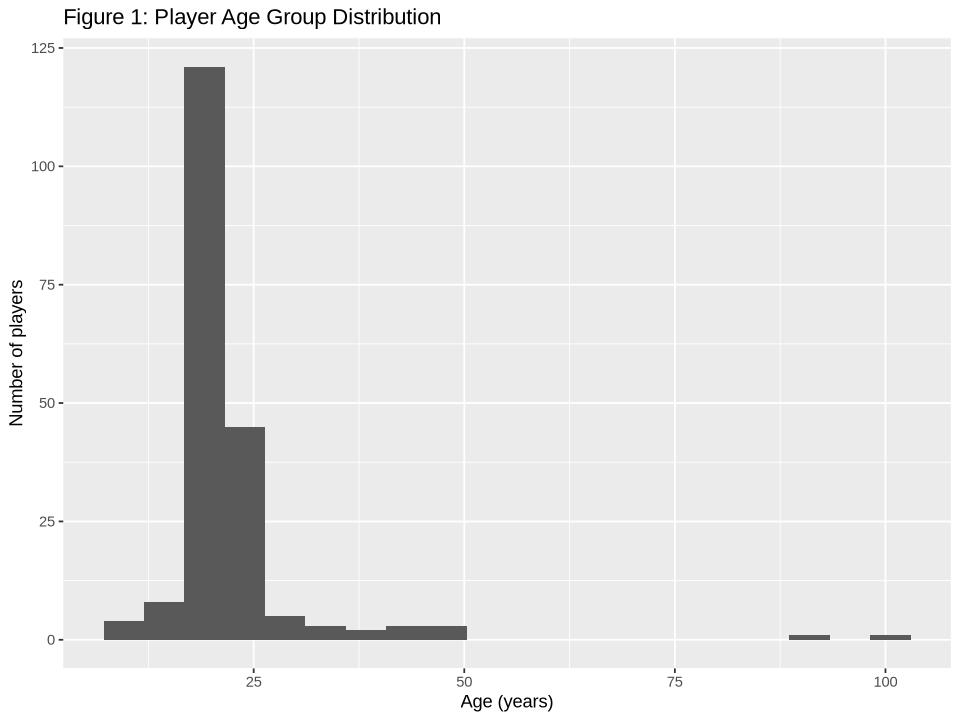

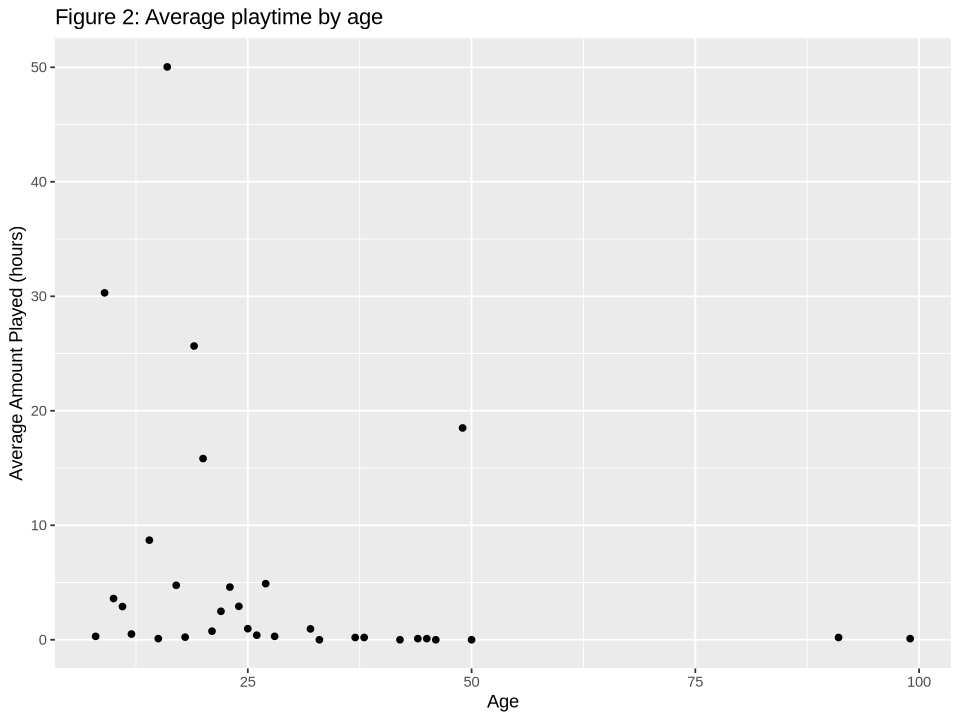

In [29]:
## Visualization of the dataset for exploratory data analysis

options(repr.plot.width = 8, repr.plot.height = 6)

age_histo <- players |>
    ggplot(aes(x = age)) +
    geom_histogram(bins = 20) +
    labs(x = "Age (years)",
        y = "Number of players",
        title = "Figure 1: Player Age Group Distribution")

age_histo

age_hours_plot <- players |>
                group_by(age) |>
                summarize(avg_hours = mean(played_hours)) |>
                ggplot(aes(x = age, y = avg_hours)) +
                geom_point() +
                labs(x = "Age", 
                     y = "Average Amount Played (hours)", 
                     title = "Figure 2: Average playtime by age")

age_hours_plot

We can see in the above visualizations that most players are in the age range of around 15-20 years old, and that players in this range also contribute the most playtime.

We now begin creating our KNN-regression model to predict playtime by age. First, we split the data into training and testing datasets, with a proportion of 70%, with `strata` set to `played_hours`. Next, we use 10-fold cross-validation with the training data to find the optimal $k$ values. We ensure that the `neighbors` parameter is set to `tune()` as we want to tune the model, and we collect metrics for $k$ values from 1-50. Finally, we find the $k$ value for which the $RMSE$ value is lowest.

In [35]:
set.seed(1)

options(repr.plot.width = 12, repr.plot.height = 6)

# Tuning the regression model by finding the optimal k value
players_split <- initial_split(players, prop = 0.7, strata = played_hours)
players_training <- training(players_split)
players_testing <- testing(players_split)

players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression")

players_recipe <- recipe(played_hours ~ age, data = players_training) |>
    step_scale(age) |>
    step_center(age)

# 10-fold cross validation
players_vfold <- vfold_cv(players_training, v = 10, strata = played_hours)

players_workflow <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec)

gridvals <- tibble(neighbors = seq(from = 1, to = 50, by = 1))

player_results <- players_workflow |>
    tune_grid(resamples = players_vfold, grid = gridvals) |>
    collect_metrics()

player_min <- player_results |>
    filter(.metric == "rmse") |>
    slice_min(n = 1, mean)

player_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
23,rmse,standard,21.75977,10,7.592461,Preprocessor1_Model23


We now test our regression model with the testing data, and we obtain an $RMSPE$ value of about 22 hours.

In [36]:
# Assessing how well our regression model will do on the testing data
set.seed(1)

k_min <- player_min |>
    pull(neighbors) 

players_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) |>
    set_engine("kknn") |>
    set_mode("regression")

players_best_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_best_spec) |>
    fit(data = players_training)

players_summary <- players_best_fit |>
    predict(players_testing) |>
    bind_cols(players_testing) |>
    metrics(truth = played_hours, estimate = .pred)

players_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,21.61877783
rsq,standard,0.01123679
mae,standard,7.07847826


We visualize the relationship between age and playtime, with the line of regression:

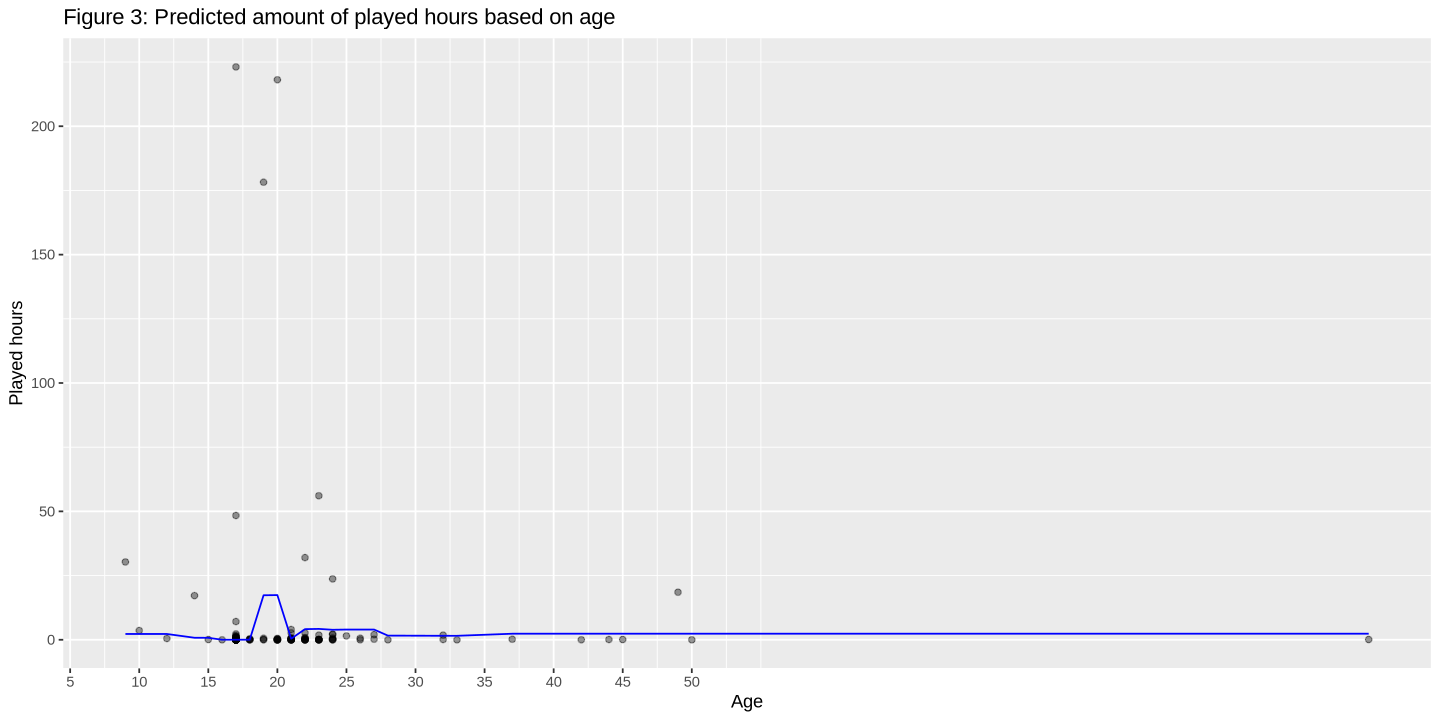

In [39]:
# Visualization of the predictions between age and played hours

player_preds <- players_best_fit |>
    predict(players_training) |>
    bind_cols(players_training) 

players_plot <- player_preds |>
    ggplot(aes (x = age, y = played_hours)) +
    geom_point(alpha = 0.4) +
    geom_line(data = player_preds, color = "blue", aes(x = age, y = .pred)) +
    labs(x = "Age", y = "Played hours") +
    ggtitle("Figure 3: Predicted amount of played hours based on age") +
    scale_x_continuous(breaks = seq(0, 50, 5))

players_plot


We see that there is a "peak" in the age range of around 16-21, and a smaller trend in the age range of around 21-26. As the age continues to increase, the line of regression forms a horizontal asymptote about 0 played hours.

## Discussion

### Summary of Findings
There were no obvious trends between age and amount of hours played on PlaiCraft for players over the age of around 28 years old, where the regression line begins to form an asymptote. Players below the age of 28 seem to contribute more playtime than older players.

### Were the results expected?
Yes, these results were expected, as younger people generally tend to play video games more often than older users. Our regression model follows this trend as players under 28 generally play more than players older than 28. To add to this, most of the players playing PLAICraft are university students from UBC who are usually under the age 28; this means that there would be more data to gather from younger students than older students where we don't have as much data. 

### What impact could these findings have?
The research group in Computer Science at UBC should aim to recruit players of age 28 or less to play PLAICraft in order to maximize the amount of data they will contribute to the project.

### What future questions could this lead to?
We found that we didn't have as much data on players above the age of 28, so a question we could ask is if the prediction line would change if we had more data on older players.
Another question we could ask is how we could get older players to contribute more to the PLAICraft research project.